# Advanced  Linear Regression Assignment By Abhinav Pandey
## Surprise Housing Case Study

#### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in a CSV file.

#### The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

#### The company wants to know:

1. Which variables are significant in predicting the price of a house, and how well those variables describe the price of a house. 
2. Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal:

#### We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### Steps to achieve the desired business goal:
1. Data Capture.
2. Data Understanding & EDA.
3. Data Cleaning.
4. Data Preparation.
5. Model Building & Evaluation.
6. Summary

One key point to note here is, since this is the first Advanced Regression assignment, not a lot of emphasis has been given on removing predictor variables using EDA, RFE etc. as we need to see how Ridge & Lasso treat these variables.

I have tried to follow what has been once said by the great Albert Einstein:

“Everything should be made simple as possible, but not simpler – Albert Einstein”.



### Let's Begin!! 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import datetime 
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
import os

# Hide warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning) 

## 1. Data Capture.

In [4]:
# Reading the dataset
house_df = pd.read_csv("train.csv",sep=r'\s*,\s*',engine='python')

house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Data Understanding & EDA.

In [6]:
# Let's check the dataset for null values in columns
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# For the year columns, let's convert them into present age to make them numeric and more easily understandable

current_year = int(datetime.datetime.now().year)
house_df['YearBuilt_Age'] = current_year-house_df.YearBuilt
house_df['YearRemodAdd_Age'] = current_year - house_df.YearRemodAdd
house_df['GarageYrBlt_Age'] = current_year - house_df.GarageYrBlt
house_df['YrSold_Age'] = current_year - house_df.YrSold

house_df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Age','YearRemodAdd_Age',
             'GarageYrBlt_Age','YrSold_Age']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
175,1950,2001,1950.0,2007,74,23,74.0,17
1199,1963,1979,1974.0,2006,61,45,50.0,18
41,1959,1959,1959.0,2007,65,65,65.0,17
299,1950,2004,1950.0,2009,74,20,74.0,15
1434,1977,1977,1977.0,2006,47,47,47.0,18
1,1976,1976,1976.0,2007,48,48,48.0,17
778,1977,1977,1977.0,2007,47,47,47.0,17
317,2006,2006,2006.0,2007,18,18,18.0,17
1371,1955,1996,1955.0,2008,69,28,69.0,16
1348,1998,1998,1998.0,2007,26,26,26.0,17


In [8]:
# Let's drop these columns as we have got their Ages now.
house_df.drop(['YearBuilt', 'YearRemodAdd','GarageYrBlt','YrSold'], axis = 1, inplace = True)

house_df.shape

(1460, 81)

##### From the data dictionary, we see that the predictor variables 'MSSubClass' , 'OverallQual' & 'OverallCond' are actually categorical variables. ##### Although they have numerical values but they all are mapped to different categories as follows:

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

##### Let's change it to a categorical variable so that we do not miss on analyzing it well and do the mapping accordingly for them to be used as dummy variables later.

In [10]:
house_df['MSSubClass'].astype('object')
house_df['OverallQual'].astype('object')
house_df['OverallCond'].astype('object')

0       5
1       8
2       5
3       5
4       5
       ..
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, Length: 1460, dtype: object

In [11]:
# Let's map the values in these columns to their string counterparts.
MSSubClassMapping = {
    20:"1-STORY 1946 & NEWER ALL STYLES",
    30:"1-STORY 1945 & OLDER",
    40:"1-STORY W/FINISHED ATTIC ALL AGES",
    45:"1-1/2 STORY - UNFINISHED ALL AGES",
    50:"1-1/2 STORY FINISHED ALL AGES",
    60:"2-STORY 1946 & NEWER",
    70:"2-STORY 1945 & OLDER",
    75:"2-1/2 STORY ALL AGES",
    80:"SPLIT OR MULTI-LEVEL",
    85:"SPLIT FOYER",
    90:"DUPLEX - ALL STYLES AND AGES",
    120:"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
    150:"1-1/2 STORY PUD - ALL AGES",
    160:"2-STORY PUD - 1946 & NEWER",
    180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
    190:"2 FAMILY CONVERSION - ALL STYLES AND AGES"
}
house_df = house_df.replace({"MSSubClass": MSSubClassMapping })

In [12]:
house_df.MSSubClass.value_counts()

MSSubClass
1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: count, dtype: int64

In [13]:
# Mappings for OverallCond & OverallQual are exactly same. Let's map them too.
OverallMapping = {
    
      10:"Very Excellent",
       9:"Excellent",
       8:"Very Good",
       7:"Good",
       6:"Above Average",
       5:"Average",
       4:"Below Average",
       3:"Fair",
       2:"Poor",
       1:"Very Poor"
}
house_df = house_df.replace({"OverallQual": OverallMapping })
house_df = house_df.replace({"OverallCond": OverallMapping })

In [14]:
house_df.OverallQual.value_counts()


OverallQual
Average           397
Above Average     374
Good              319
Very Good         168
Below Average     116
Excellent          43
Fair               20
Very Excellent     18
Poor                3
Very Poor           2
Name: count, dtype: int64

In [15]:
house_df.OverallCond.value_counts()

OverallCond
Average          821
Above Average    252
Good             205
Very Good         72
Below Average     57
Fair              25
Excellent         22
Poor               5
Very Poor          1
Name: count, dtype: int64

#### Let's draw some plots for the above variables

C:\Users\Admin\anaconda3\envs\NN\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  self._figure.tight_layout(*args, **kwargs)


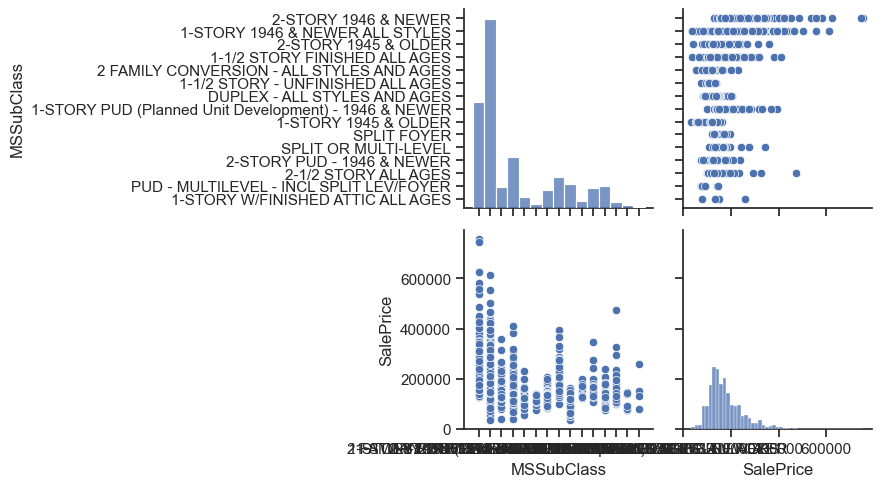

In [17]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(house_df,vars=["MSSubClass", "SalePrice"])

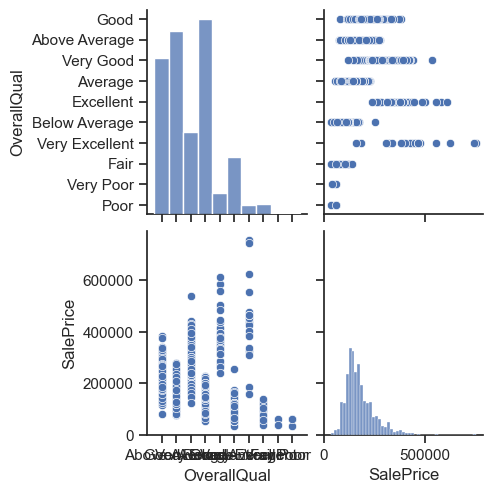

In [18]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(house_df,vars=["OverallQual", "SalePrice"])

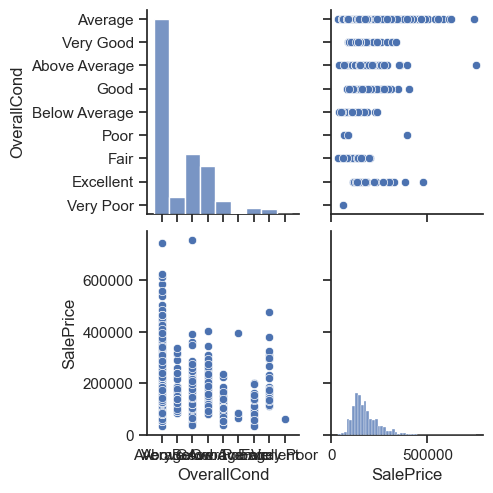

In [19]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(house_df,vars=["OverallCond", "SalePrice"])

#### Let's analyse few categorical varaibles like Street & Utilities for their value counts and decide if we need to keep'em.

In [21]:
#Let's analyze columns like Street &  Utilities for their value occurances
house_df.Street.value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [22]:
house_df.Utilities.value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [23]:
# Clearly, from analyses done above, 'Utilities' & 'Street' have no significance as just one value is present in maximum number of records.
# Let's drop these columns and the column 'Id'.
house_df.drop(['Street', 'Utilities','Id'], axis = 1, inplace = True)

In [24]:
# We also see that the column "Alley" has only 91 non null values. Let's analyze all such columns where
# the number of missing values per column is more than 80 %. In such cases, it is better to drop them.
round(house_df.isnull().sum()/len(house_df.index),2)[round(house_df.isnull().sum()/
                                                                 len(house_df.index),2).values>0.80]

Alley          0.94
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [25]:
# Let's remove the ablove columns since they are hardly going to have any impact on our modelling
house_df.drop(['Alley', 'PoolQC','Fence','MiscFeature'], axis = 1, inplace = True)

In [26]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   object 
 1   MSZoning          1460 non-null   object 
 2   LotFrontage       1201 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   LotShape          1460 non-null   object 
 5   LandContour       1460 non-null   object 
 6   LotConfig         1460 non-null   object 
 7   LandSlope         1460 non-null   object 
 8   Neighborhood      1460 non-null   object 
 9   Condition1        1460 non-null   object 
 10  Condition2        1460 non-null   object 
 11  BldgType          1460 non-null   object 
 12  HouseStyle        1460 non-null   object 
 13  OverallQual       1460 non-null   object 
 14  OverallCond       1460 non-null   object 
 15  RoofStyle         1460 non-null   object 
 16  RoofMatl          1460 non-null   object 


#### Let's get the list of categorical & numerical columns for our further analysis.

In [28]:
categorical_columns = []
numeric_columns = []
for c in house_df.columns:
    if house_df[c].map(type).eq(str).any(): #check if there are any strings in column
        categorical_columns.append(c)
    else:
        numeric_columns.append(c)

In [29]:
# Let's list down all categorical columns
categorical_columns

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [30]:
# Let's list down all numerial columns
numeric_columns

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'YearBuilt_Age',
 'YearRemodAdd_Age',
 'GarageYrBlt_Age',
 'YrSold_Age']

#### Let's impute the categorical columns & numerical columns having missing values.
#### We will impute any categorical column with 'NA' and numerical column with 'mean'.

In [32]:
#create two DataFrames, one for each data type
data_numeric = house_df[numeric_columns]
data_categorical = house_df[categorical_columns]

# fill the numerical columns with the mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data_numeric = pd.DataFrame(imp.fit_transform(data_numeric), columns = data_numeric.columns)

# and the categorical columns with 'NA'
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_categorical = pd.DataFrame(imp.fit_transform(data_categorical), columns = data_categorical.columns) 

#join the two masked dataframes back together
house_df = pd.concat([data_numeric, data_categorical], axis = 1)


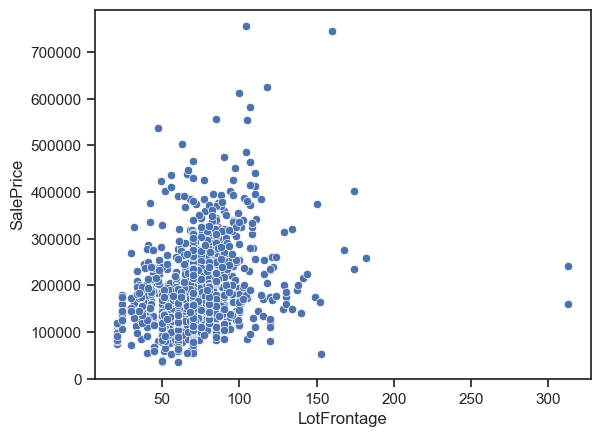

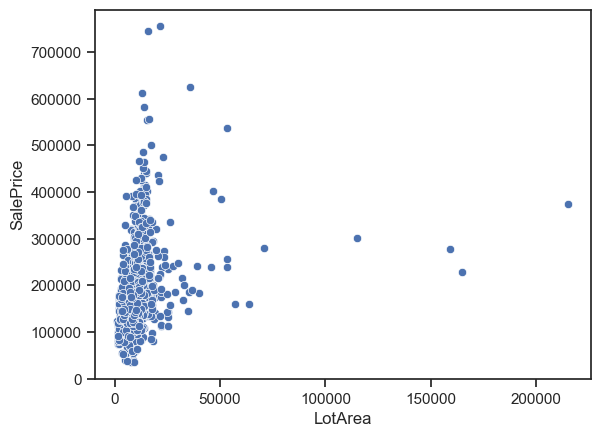

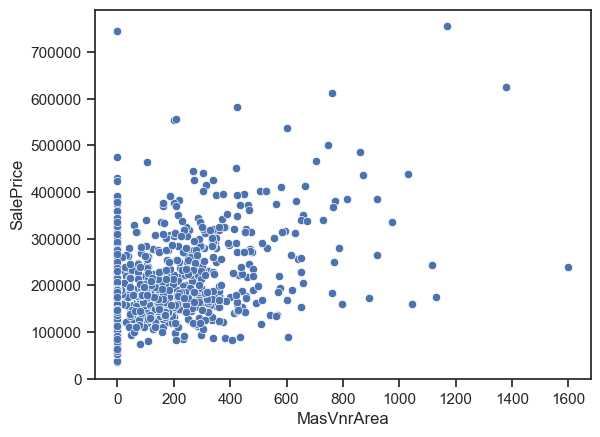

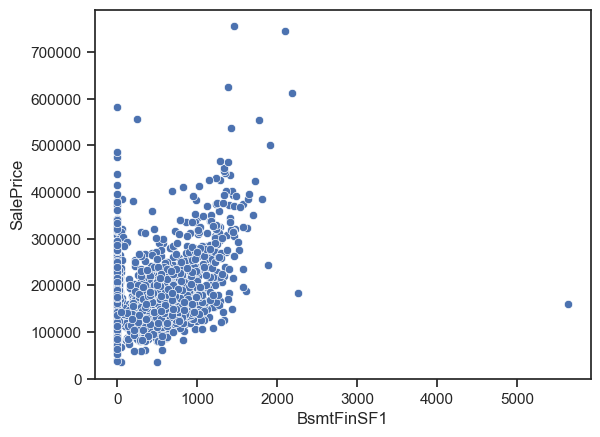

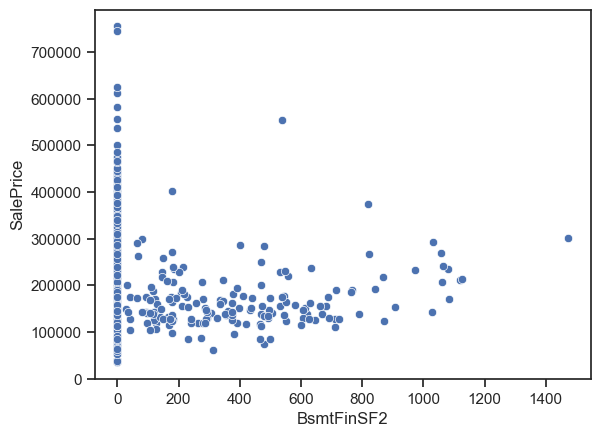

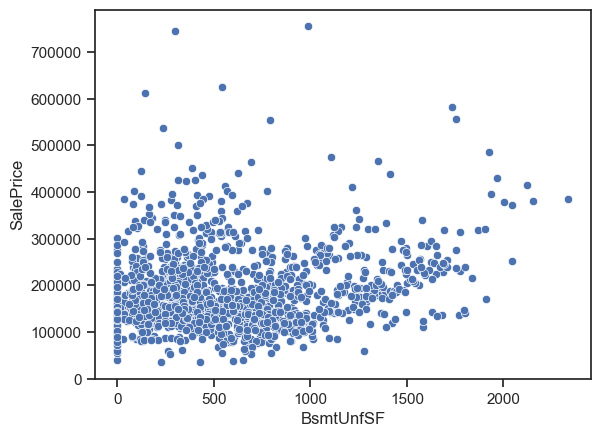

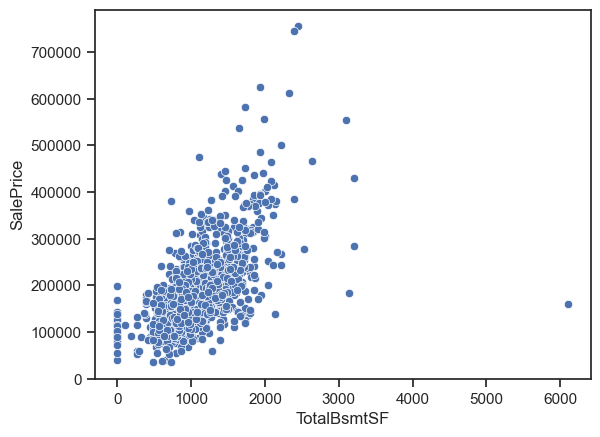

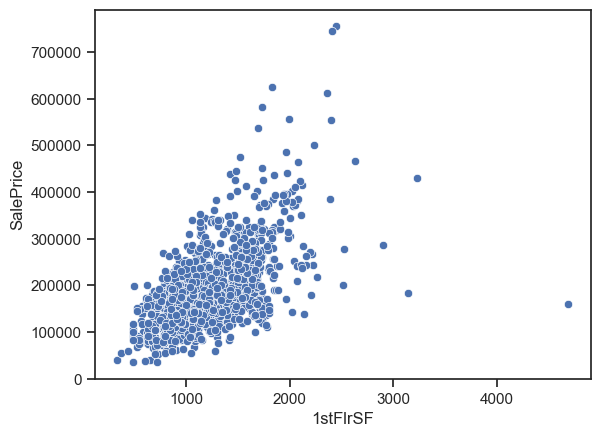

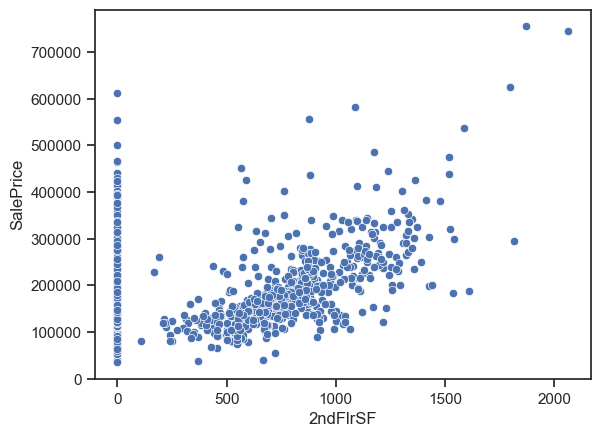

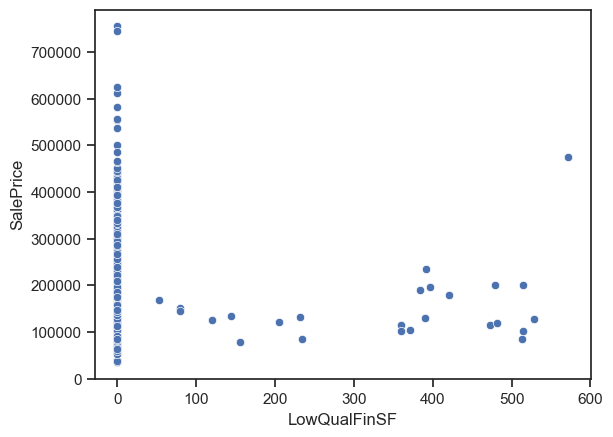

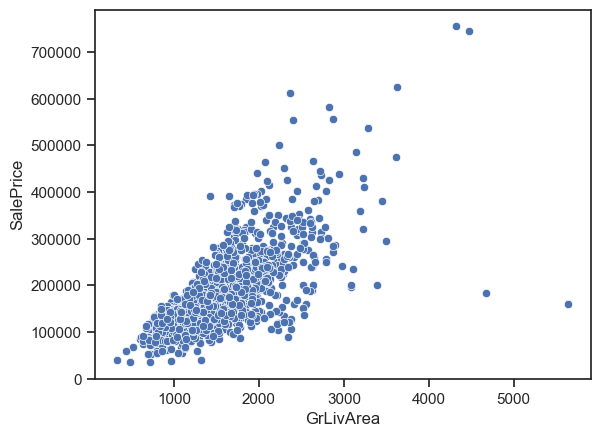

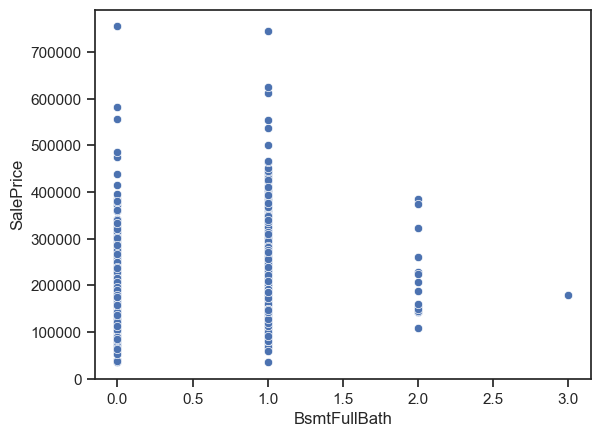

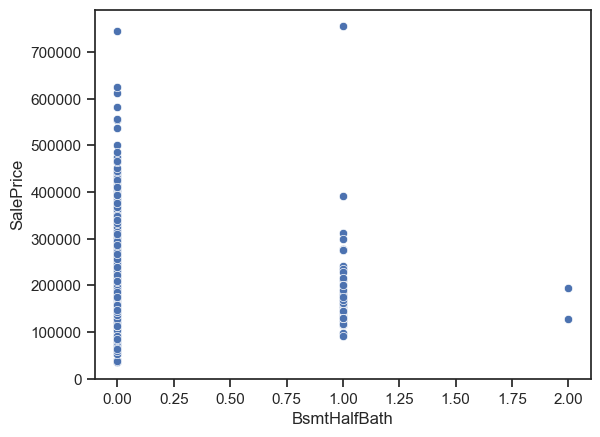

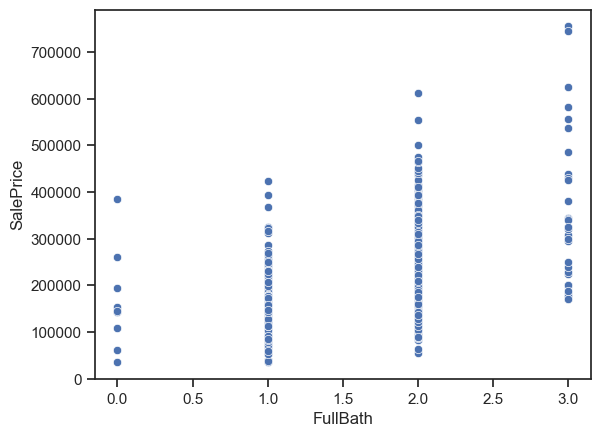

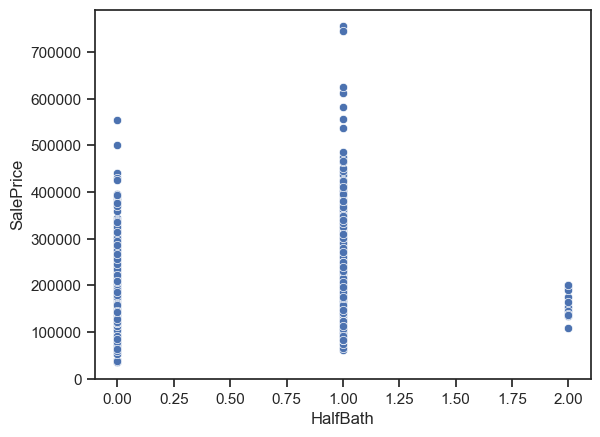

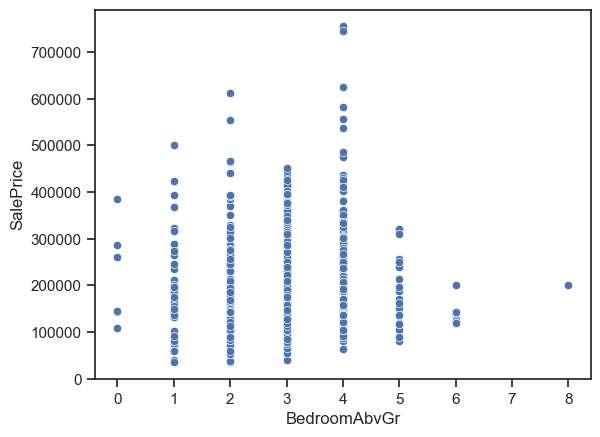

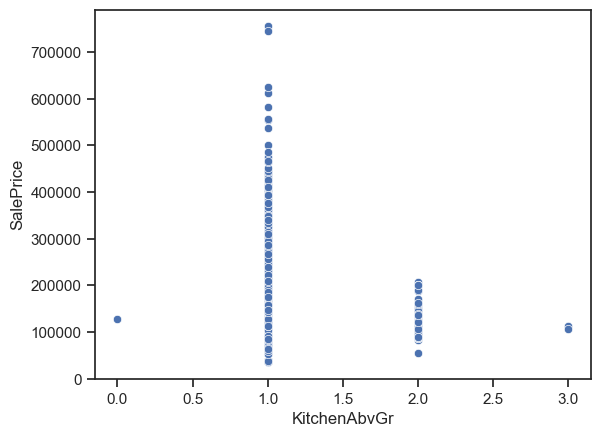

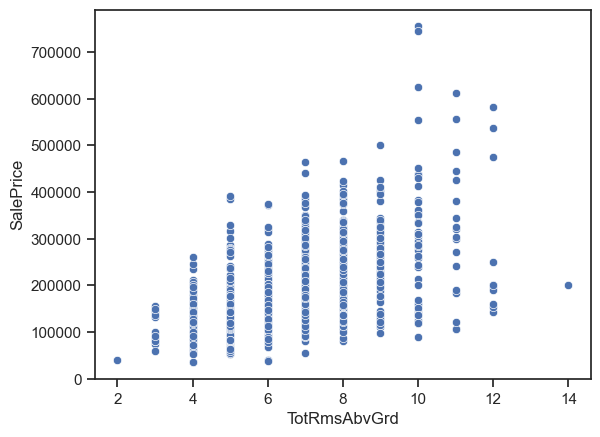

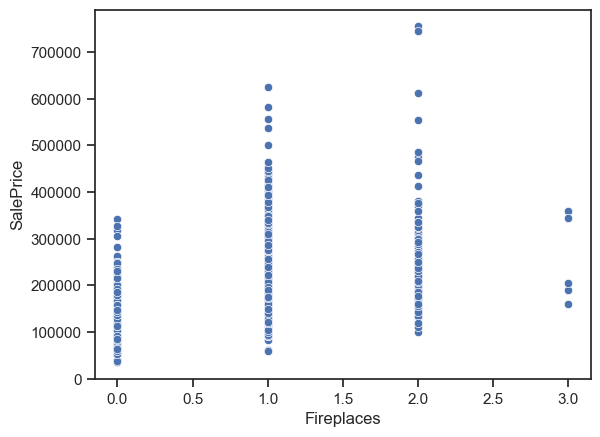

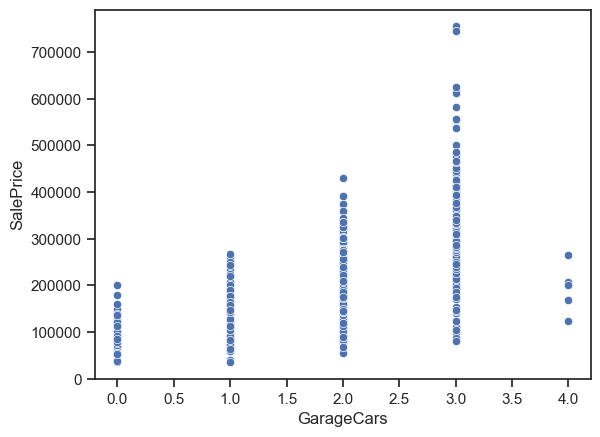

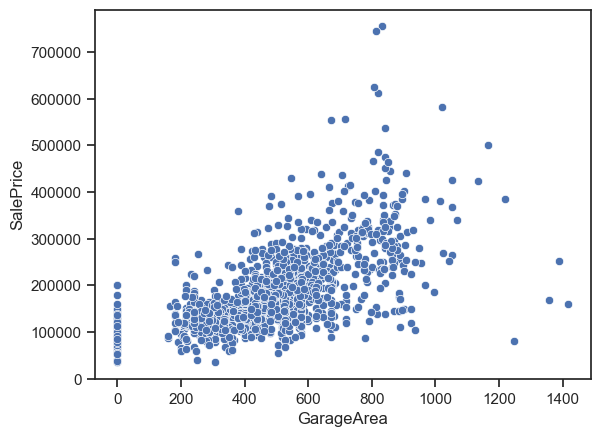

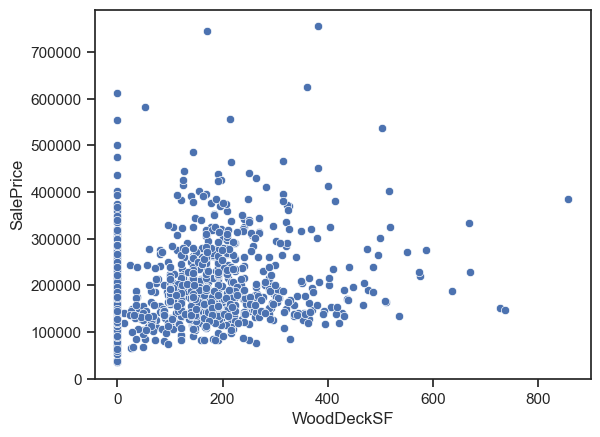

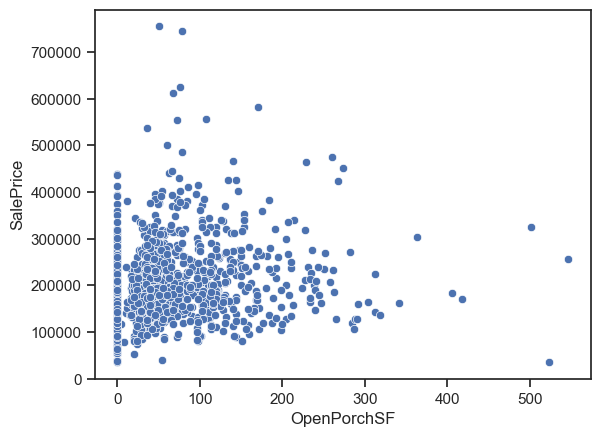

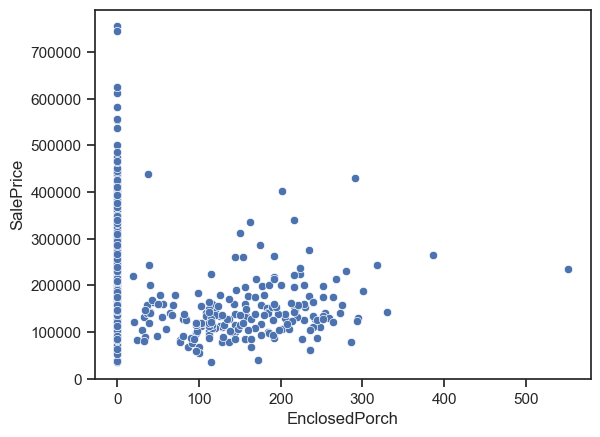

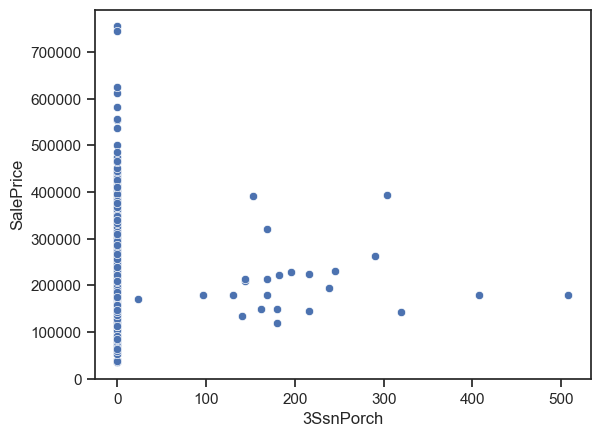

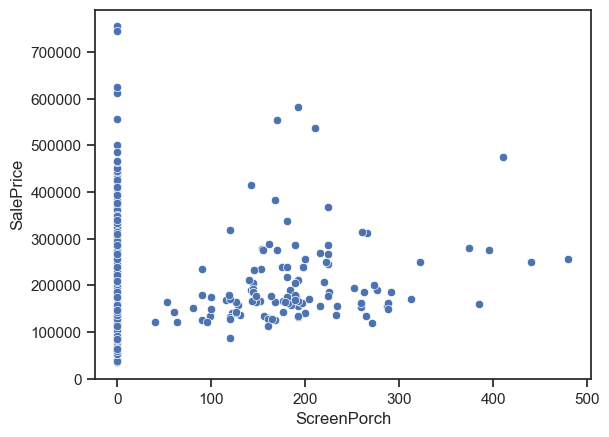

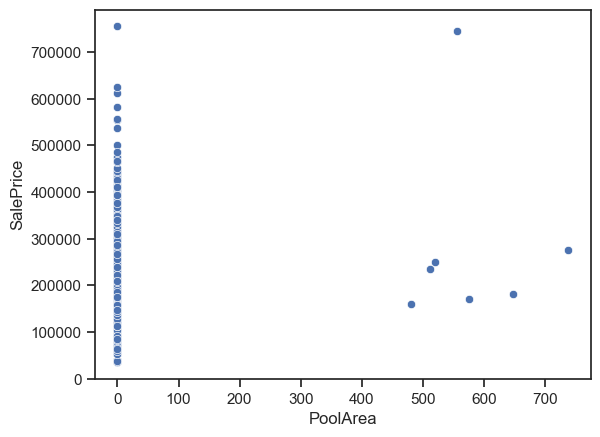

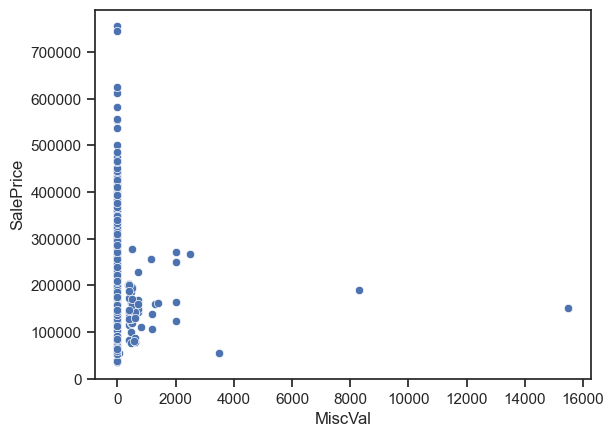

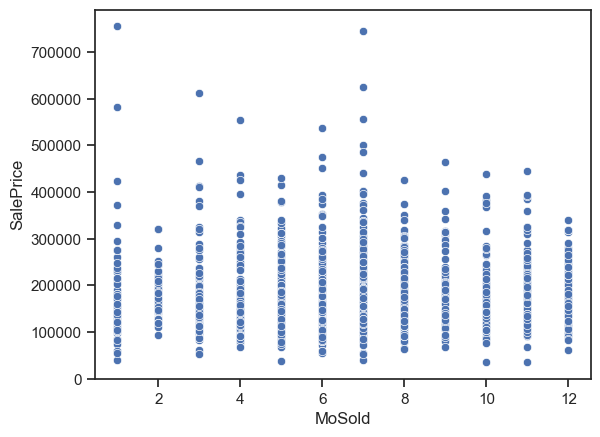

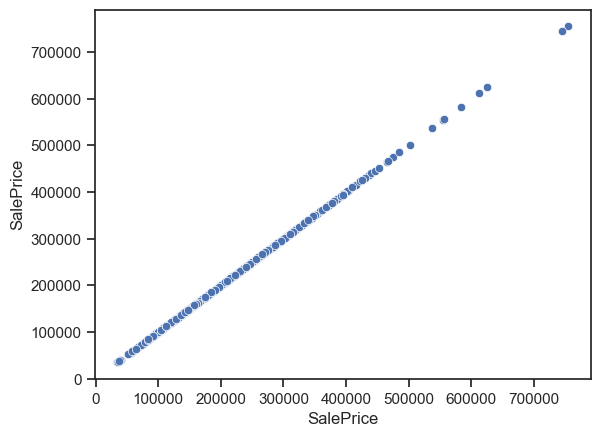

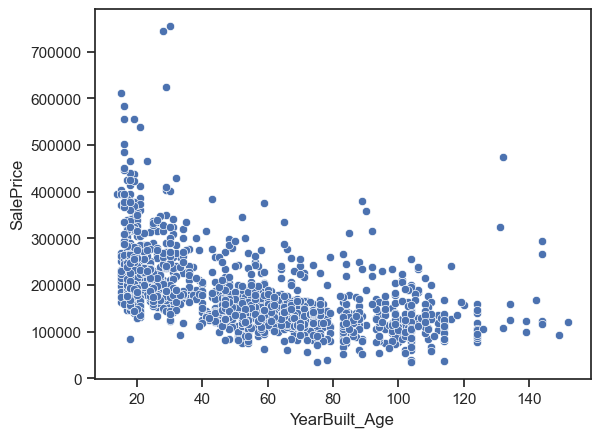

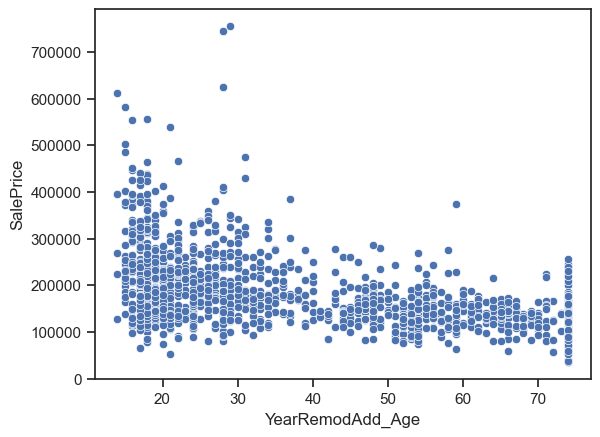

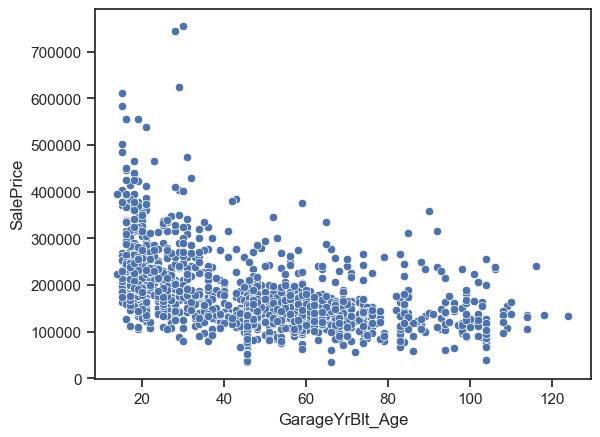

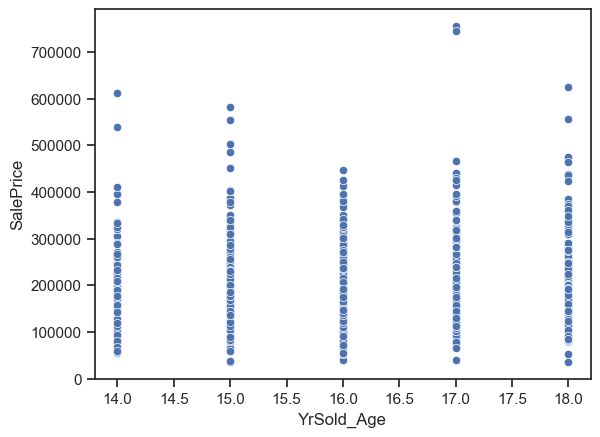

In [33]:
# we will plot all the numeric variables one by one through a loop

for feature, column in enumerate (data_numeric.columns):
    plt.figure(feature)
    sns.scatterplot(x=data_numeric[column],y=data_numeric['SalePrice'])

#### Correlation matrix to check the relationship between variables

<Axes: >

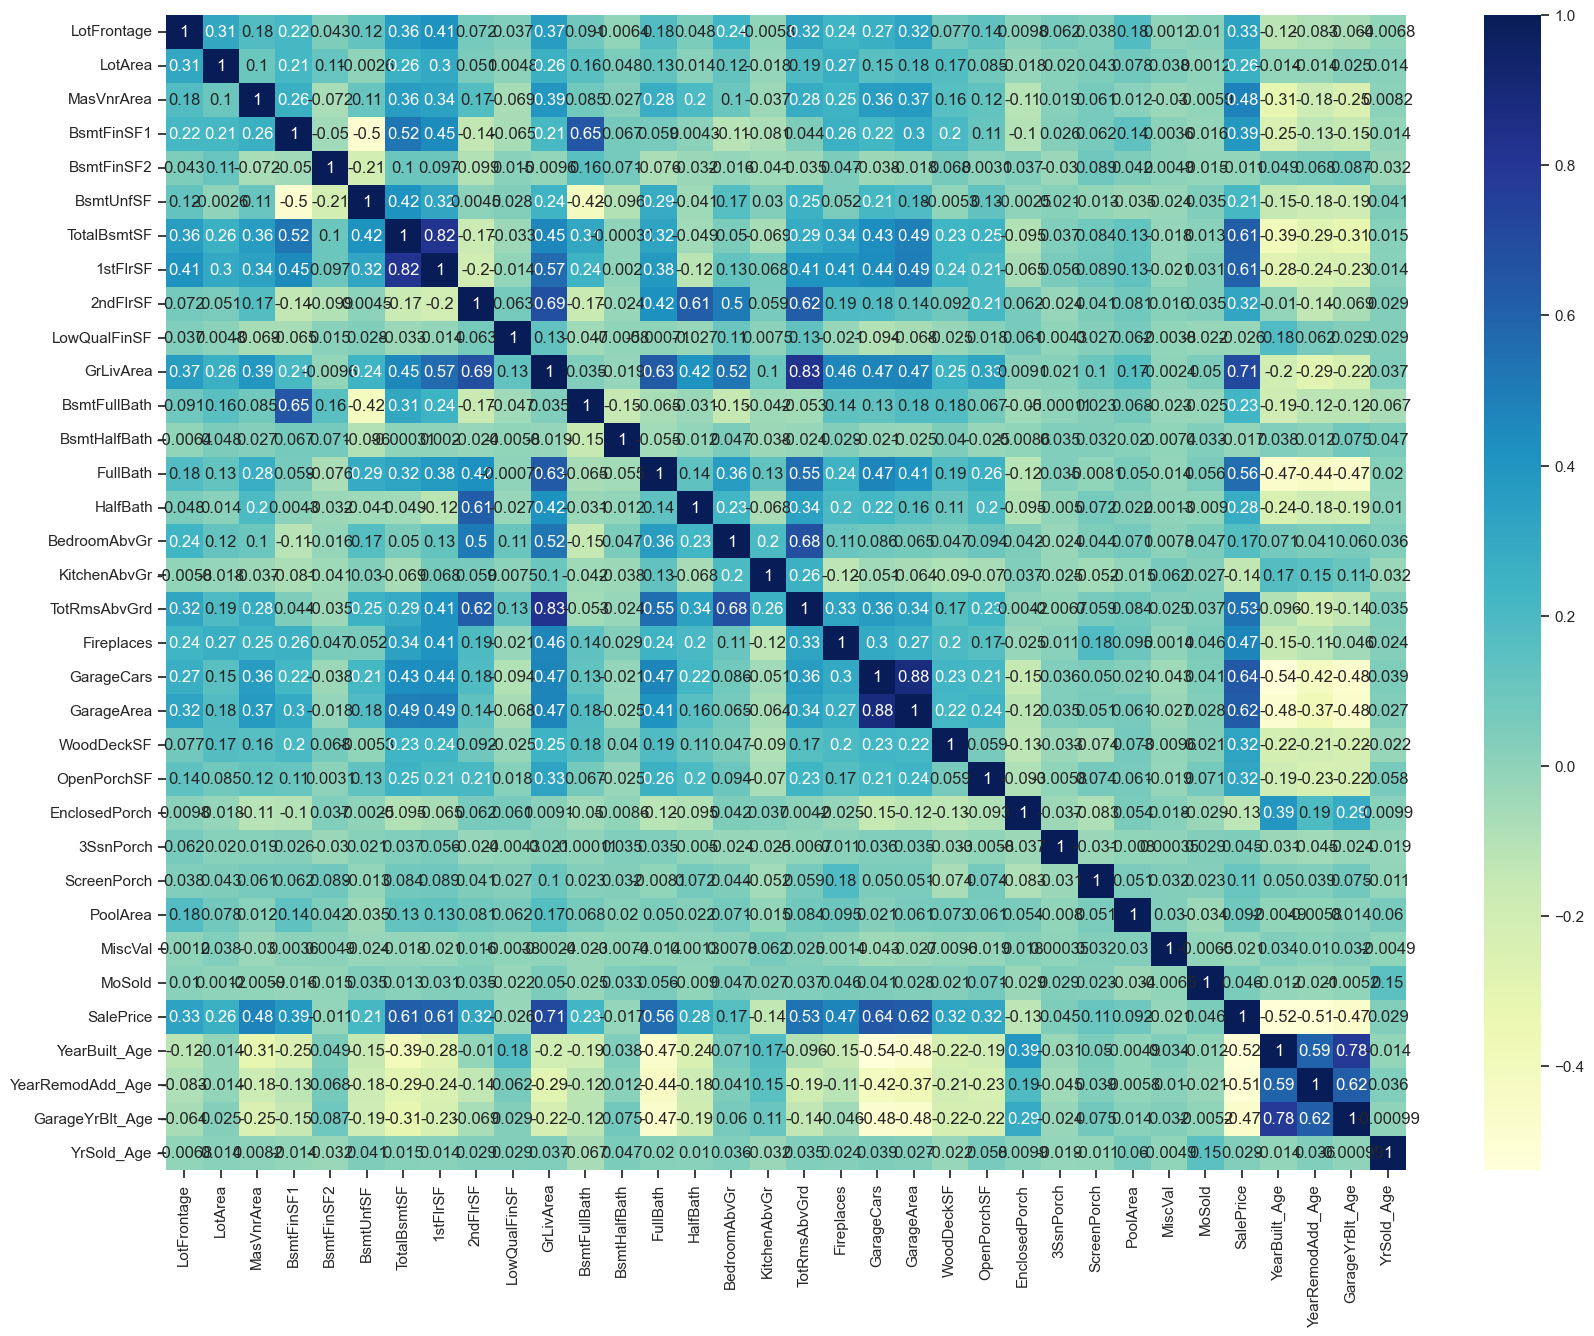

In [35]:
corr=data_numeric.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

#### Inference
Predictors having strong correlation are:
1. GarageYrBuilt_Age with YearBuilt_Age.
2. GrLivArea with TotRmsAboveGrid.
3. GarageArea with GarageCars.

Highly correlated independed variables lead to the problem of multicolinearity which needs to be dealt with carefully.

## 3. Data Cleaning.

In [38]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LotFrontage       1460 non-null   float64
 1   LotArea           1460 non-null   float64
 2   MasVnrArea        1460 non-null   float64
 3   BsmtFinSF1        1460 non-null   float64
 4   BsmtFinSF2        1460 non-null   float64
 5   BsmtUnfSF         1460 non-null   float64
 6   TotalBsmtSF       1460 non-null   float64
 7   1stFlrSF          1460 non-null   float64
 8   2ndFlrSF          1460 non-null   float64
 9   LowQualFinSF      1460 non-null   float64
 10  GrLivArea         1460 non-null   float64
 11  BsmtFullBath      1460 non-null   float64
 12  BsmtHalfBath      1460 non-null   float64
 13  FullBath          1460 non-null   float64
 14  HalfBath          1460 non-null   float64
 15  BedroomAbvGr      1460 non-null   float64
 16  KitchenAbvGr      1460 non-null   float64


In [39]:
house_df.head(20)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,65.000000,8450.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,...,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,WD,Normal
1,80.000000,9600.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,68.000000,11250.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,60.000000,9550.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,84.000000,14260.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
5,85.000000,14115.0,0.0,732.0,0.0,64.0,796.0,796.0,566.0,0.0,...,TA,Typ,NA,Attchd,Unf,TA,TA,Y,WD,Normal
6,75.000000,10084.0,186.0,1369.0,0.0,317.0,1686.0,1694.0,0.0,0.0,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
7,70.049958,10382.0,240.0,859.0,32.0,216.0,1107.0,1107.0,983.0,0.0,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
8,51.000000,6120.0,0.0,0.0,0.0,952.0,952.0,1022.0,752.0,0.0,...,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,50.000000,7420.0,0.0,851.0,0.0,140.0,991.0,1077.0,0.0,0.0,...,TA,Typ,TA,Attchd,RFn,Gd,TA,Y,WD,Normal


In [40]:
# Below function is used for hadling the outliers where I am taking the lower and upper quantile as 0.25 & 0.99 respectively
def drop_outliers(x):
    list = []
    for col in data_numeric:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_df = drop_outliers(house_df)

house_df.shape

(1439, 74)

## 4. Data Preparation.

In [42]:
# Let's create X & y datasets for further analysis.
X=house_df.drop(columns=['SalePrice'])
y=house_df['SalePrice']

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1439 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LotFrontage       1439 non-null   float64
 1   LotArea           1439 non-null   float64
 2   MasVnrArea        1439 non-null   float64
 3   BsmtFinSF1        1439 non-null   float64
 4   BsmtFinSF2        1439 non-null   float64
 5   BsmtUnfSF         1439 non-null   float64
 6   TotalBsmtSF       1439 non-null   float64
 7   1stFlrSF          1439 non-null   float64
 8   2ndFlrSF          1439 non-null   float64
 9   LowQualFinSF      1439 non-null   float64
 10  GrLivArea         1439 non-null   float64
 11  BsmtFullBath      1439 non-null   float64
 12  BsmtHalfBath      1439 non-null   float64
 13  FullBath          1439 non-null   float64
 14  HalfBath          1439 non-null   float64
 15  BedroomAbvGr      1439 non-null   float64
 16  KitchenAbvGr      1439 non-null   float64
 17  

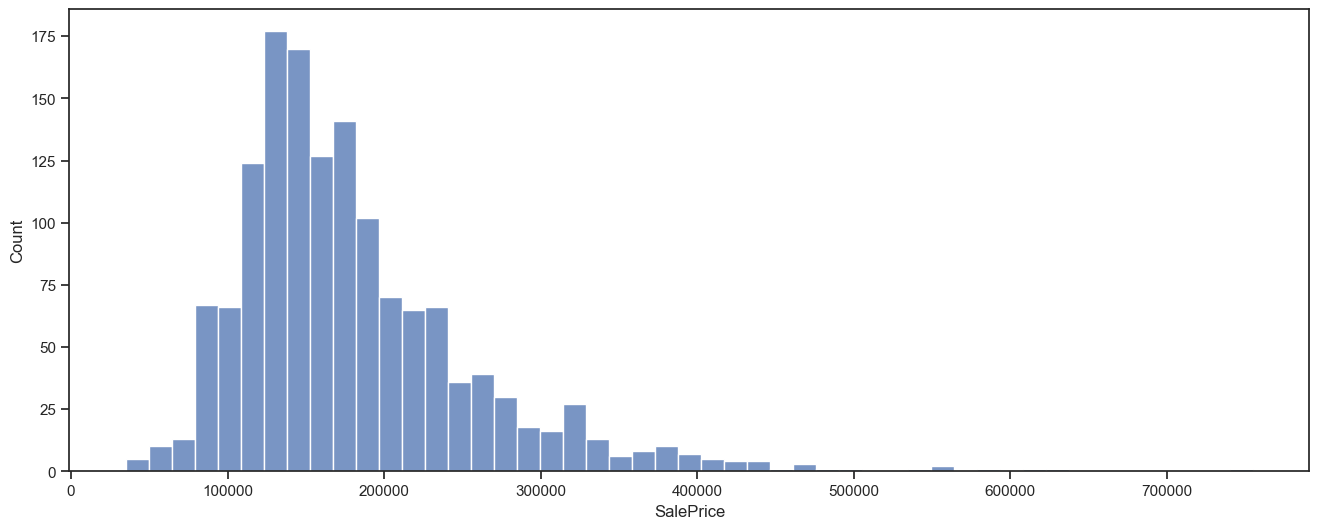

In [44]:
# Let's check the distribution of SalePrice column
plt.figure(figsize=(16,6))
sns.histplot(house_df.SalePrice)
plt.show()

In [45]:
# We see that its not perfectly normalized, rather, it's skewed. Let's transform it to use the log value.
y_log = np.log(house_df.SalePrice + 1)
y_log.describe()

count    1439.000000
mean       12.020490
std         0.397024
min        10.460271
25%        11.774528
50%        11.995358
75%        12.269639
max        13.534474
Name: SalePrice, dtype: float64

In [46]:
# Lets normalize it now.
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

y_log_normalized = normalize(y_log)
y_log_normalized.describe()

count    1439.000000
mean        0.507520
std         0.129147
min         0.000000
25%         0.427511
50%         0.499345
75%         0.588565
max         1.000000
Name: SalePrice, dtype: float64

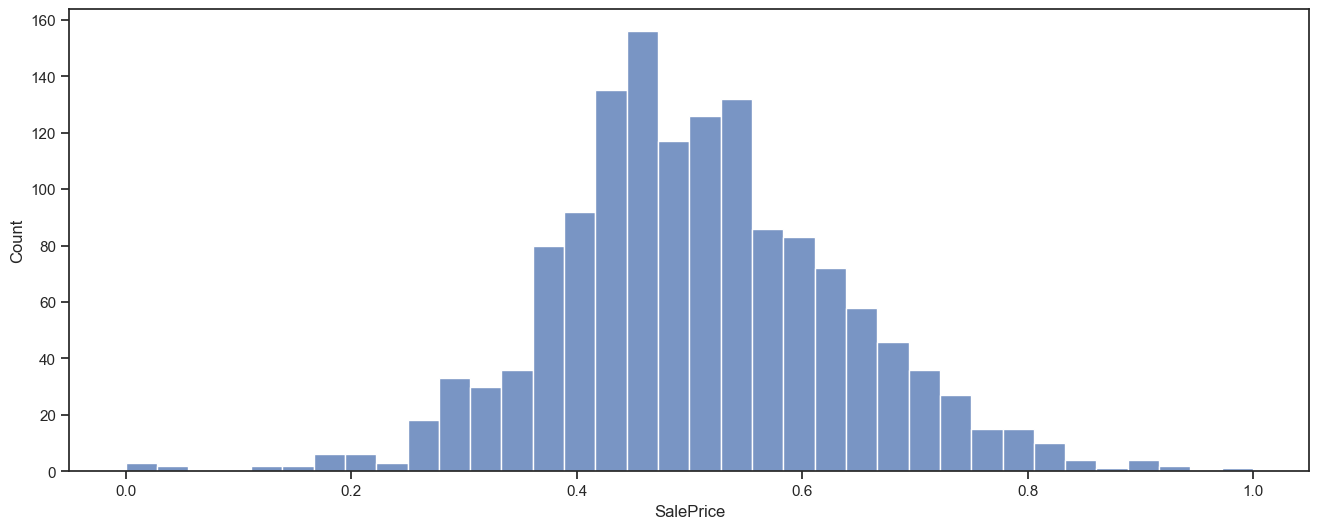

In [47]:
# Let's plot it to see if it has improved on a log scale.
plt.figure(figsize=(16,6))
sns.histplot(y_log_normalized)
plt.show()

#### Looks well normalized now. We are good to use it and proceed further.

In [49]:
y_log_normalized.describe()

count    1439.000000
mean        0.507520
std         0.129147
min         0.000000
25%         0.427511
50%         0.499345
75%         0.588565
max         1.000000
Name: SalePrice, dtype: float64

In [50]:
# creating dummy variables from the list of categorical variables just created.
dummy_vars_df = pd.get_dummies(data_categorical, drop_first=True)
dummy_vars_df.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [51]:
# since we have the dummy variables now, get can drop the categorical variables from X.
X=X.drop(columns=data_categorical)
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
0,65.0,8450.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,21.0,21.0,21.0,16.0
1,80.0,9600.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,48.0,48.0,48.0,17.0
2,68.0,11250.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,23.0,22.0,23.0,16.0
3,60.0,9550.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,...,272.0,0.0,0.0,0.0,0.0,2.0,109.0,54.0,26.0,18.0
4,84.0,14260.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,24.0,24.0,24.0,16.0


In [52]:
# Convert index to categorical in X
X = X.set_index(X.index.astype('category'))

# Fill NaNs in dummy variables
dummy_vars_df = dummy_vars_df.fillna(method='ffill')

# Merge without index issues
X = pd.merge(X, dummy_vars_df, left_index=True, right_index=True)

In [53]:
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=273)

In [54]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=273)

In [55]:
# split into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_log_normalized, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 5. Model Building & Evaluation.

#### We start with Ridge Regression first.

In [58]:
# We will use numpy.linspace to create the alpha values with equal steps
alphaArray = np.linspace(1, 1000, num=50)

In [59]:
# list of alphas to tune

params = {'alpha': alphaArray}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([   1.        ,   21.3877551 ,   41.7755102 ,   62.16326531,
         82.55102041,  102.93877551,  123.32653061,  143.71428571,
        164.10204082,  184.48979592,  204.87755102,  225.26530612,
        245.65306122,  266.04081633,  286.42857143,  306.81632653,
        327.20408163,  347.59183673,  367.97959184,  388.36734694,
        408.75510204,  429.14285714,  449.53061224,  469....
        490.30612245,  510.69387755,  531.08163265,  551.46938776,
        571.85714286,  592.24489796,  612.63265306,  633.02040816,
        653.40816327,  673.79591837,  694.18367347,  714.57142857,
        734.95918367,  755.34693878,  775.73469388,  796.12244898,
        816.51020408,  836.89795918,  857.28571429,  877.67346939,
        898.06122449,  918.44897959,  938.83673469,  959.2244898 ,
        979.6122449 , 1000.        ])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.037689,0.015428,0.005403,0.001588,1.000000,{'alpha': 1.0},-0.030452,-0.027728,-0.031398,-0.024952,...,-0.029068,0.002413,36,-0.018413,-0.018585,-0.017226,-0.018526,-0.016886,-0.017927,0.000722
1,0.008134,0.001178,0.007158,0.007558,21.387755,{'alpha': 21.387755102040817},-0.029385,-0.027004,-0.031588,-0.025570,...,-0.028789,0.002206,32,-0.019422,-0.019220,-0.018207,-0.019443,-0.017965,-0.018851,0.000634
2,0.007641,0.000936,0.003366,0.000836,41.775510,{'alpha': 41.775510204081634},-0.028340,-0.026743,-0.031357,-0.025806,...,-0.028465,0.002050,26,-0.019870,-0.019445,-0.018603,-0.019746,-0.018387,-0.019210,0.000604
3,0.008976,0.002089,0.003126,0.000368,62.163265,{'alpha': 62.163265306122454},-0.027704,-0.026667,-0.031108,-0.025907,...,-0.028223,0.001931,22,-0.020215,-0.019632,-0.018897,-0.019955,-0.018713,-0.019482,0.000586
4,0.009129,0.000969,0.003150,0.000156,82.551020,{'alpha': 82.55102040816327},-0.027311,-0.026628,-0.030841,-0.025955,...,-0.028036,0.001827,18,-0.020480,-0.019818,-0.019138,-0.020129,-0.018993,-0.019712,0.000569


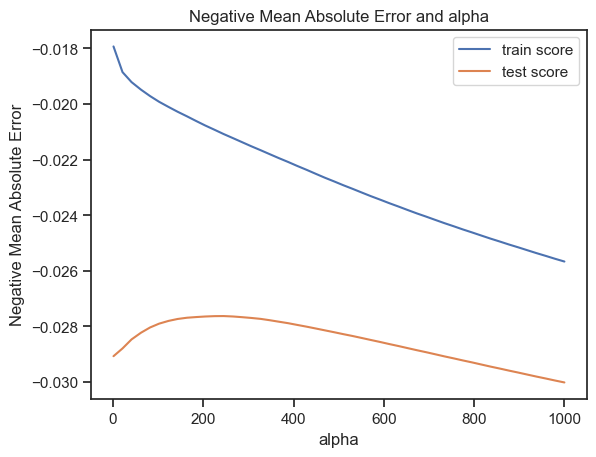

In [61]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [62]:
# Let's loop through different values of alpha to see the affect on r2 scores
for a in alphaArray:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    # Let's predict the train & test datasets now to see the 'r2 scores'.
    y_pred_train = ridge.predict(X_train)
    y_pred_test = ridge.predict(X_test)
    print('Alpha:{:1} |train_R2:{:2} |test_R2:{:3}'.format(a, r2_score(y_train,y_pred_train), r2_score(y_test,y_pred_test)))

Alpha:1.0 |train_R2:0.9550190558205026 |test_R2:0.878446438181696
Alpha:21.387755102040817 |train_R2:0.9511676712585553 |test_R2:0.891639999140862
Alpha:41.775510204081634 |train_R2:0.9493977166607352 |test_R2:0.8943263869315163
Alpha:62.163265306122454 |train_R2:0.9481485860336109 |test_R2:0.8959580987550926
Alpha:82.55102040816327 |train_R2:0.9471032999463033 |test_R2:0.8970768294622256
Alpha:102.93877551020408 |train_R2:0.9461626974890471 |test_R2:0.8978739233723669
Alpha:123.32653061224491 |train_R2:0.9452851202673999 |test_R2:0.898446770670796
Alpha:143.71428571428572 |train_R2:0.9444496836925488 |test_R2:0.8988533401613154
Alpha:164.10204081632654 |train_R2:0.9436446080191232 |test_R2:0.8991314285082279
Alpha:184.48979591836735 |train_R2:0.9428626642829441 |test_R2:0.8993072435522987
Alpha:204.87755102040816 |train_R2:0.9420991252138095 |test_R2:0.8993997925692855
Alpha:225.26530612244898 |train_R2:0.9413507415691219 |test_R2:0.8994233431703694
Alpha:245.65306122448982 |train_R2:

#### We can see that as we increae Alpha, the R2 scores tend to converge and the convergence is highest at 1000, but the change is not that significant. Also, we need to see the graph between Negative Mean Absolute Error for Test Data which peaks at Alpha:571.85 and event at this point the differenc ein R2 scores is not that huge. So, we conclude that the best fit value is Alpha:571.85.

In [64]:
# Above analysis puts the optimum value of alpha as 571.85. Let's go ahead and use it to see how the coefficients change.
alpha = 571.85
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 3.57440537e-03,  4.32816751e-03,  3.33939315e-03,  5.93848061e-03,
        1.12156264e-03,  1.24926291e-03,  7.92877714e-03,  8.93210075e-03,
        4.75055992e-03,  3.62364078e-04,  1.06848204e-02,  3.62155631e-03,
       -8.24993595e-04,  5.99268758e-03,  3.81227916e-03,  2.36135384e-03,
       -1.23588069e-03,  6.17789487e-03,  4.50822823e-03,  5.50902215e-03,
        6.53537857e-03,  3.17543095e-03,  1.80945766e-03,  6.32422097e-04,
        1.05393971e-03,  3.91095351e-03,  0.00000000e+00, -4.02606631e-04,
       -7.30285816e-04, -3.43562075e-03, -6.78389800e-03, -1.57131988e-03,
        4.59732649e-04,  6.30485695e-05, -3.96165487e-03,  8.61434927e-04,
       -6.51654384e-04,  1.13075584e-04, -8.83660765e-04,  1.25492607e-03,
        2.17971533e-03,  1.97363837e-03, -2.23352470e-03, -3.50453817e-04,
       -9.28643320e-04, -4.02603167e-04, -1.87400819e-04,  2.23318895e-03,
        7.32934206e-04,  3.33141972e-03, -1.69553261e-03,  8.31496128e-04,
        2.98721659e-04, -

In [65]:
# Let's predict the train & test datasets now to see the 'r2 scores'.
y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9298539842370012
0.8949809730992876


#### We have got the results as follows:
1. R2 score for test data: 0.93.
2. R2 score for train data: 0.89.

These seem pretty high and reasonably so as we have not removed a whole lot of variables in this modelling since we are relying on Ridge to do it for us by reducing the coefficients to values close to 0.

In [67]:
# Let's see the coefficients in descending order of their values obtained after Ridge Regression.
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [68]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
0,LotFrontage,0.508161
11,BsmtFullBath,0.010685
8,2ndFlrSF,0.008932
7,1stFlrSF,0.007929
116,OverallQual_Fair,0.006576
21,WoodDeckSF,0.006535
18,Fireplaces,0.006178
121,OverallQual_Very Poor,0.006095
14,HalfBath,0.005993
4,BsmtFinSF2,0.005938


#### Summary of Ridge Regresison:

##### The top 5 predicor variables obtained are:
1. LotFrontage: Identifies the type of dwelling involved in the sale.
2. BsmtFullBath: Basement full bathrooms.
3. 2ndFlrSF: Second floor square feet.
4. 1stFlrSF: First Floor square feet.
5. OverallQual_Fair: Overall quality being Fair.

#### Let's now continue the analysis by using Lasso Regression

In [71]:
# We will use numpy.linspace to create the alpha values with equal steps.
# Note, for Lasso we have reduced the range for Alpha as it reduces coefficient value to 0 as we increase
# and we do not want over-penalization.

alphaArray = np.linspace(0.001, 1, num=50)

# list of alphas to tune

params = {'alpha': alphaArray}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.001     , 0.02138776, 0.04177551, 0.06216327, 0.08255102,
       0.10293878, 0.12332653, 0.14371429, 0.16410204, 0.1844898 ,
       0.20487755, 0.22526531, 0.24565306, 0.26604082, 0.28642857,
       0.30681633, 0.32720408, 0.34759184, 0.36797959, 0.38836735,
       0.4087551 , 0.42914286, 0.44953061, 0.46991837, 0.49030612,
       0.51069388, 0.53108163, 0.55146939, 0.57185714, 0.5922449 ,
       0.61263265, 0.63302041, 0.65340816, 0.67379592, 0.69418367,
       0.71457143, 0.73495918, 0.75534694, 0.77573469, 0.79612245,
       0.8165102 , 0.83689796, 0.85728571, 0.87767347, 0.89806122,
       0.91844898, 0.93883673, 0.95922449, 0.97961224, 1.        ])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017791,0.006772,0.003194,0.000431,0.001000,{'alpha': 0.001},-0.025470,-0.025917,-0.028718,-0.025576,...,-0.026859,0.001483,1,-0.021821,-0.021367,-0.020958,-0.021463,-0.020584,-0.021238,0.000427
1,0.008117,0.000762,0.003191,0.000423,0.021388,{'alpha': 0.021387755102040818},-0.041548,-0.044678,-0.040214,-0.040352,...,-0.043620,0.004167,2,-0.043330,-0.042917,-0.041843,-0.042920,-0.043132,-0.042828,0.000516
2,0.006694,0.000638,0.003271,0.000239,0.041776,{'alpha': 0.041775510204081635},-0.059095,-0.059206,-0.051557,-0.057125,...,-0.059287,0.005793,3,-0.059219,-0.058471,-0.057671,-0.058751,-0.058906,-0.058603,0.000525
3,0.008170,0.000950,0.003135,0.000411,0.062163,{'alpha': 0.062163265306122456},-0.080560,-0.076449,-0.067771,-0.077077,...,-0.078392,0.007214,4,-0.078977,-0.077945,-0.076790,-0.078007,-0.077725,-0.077889,0.000698
4,0.007133,0.000581,0.002608,0.000547,0.082551,{'alpha': 0.08255102040816327},-0.097289,-0.089631,-0.080821,-0.095054,...,-0.093790,0.008392,5,-0.094250,-0.093047,-0.092545,-0.094216,-0.093032,-0.093418,0.000690


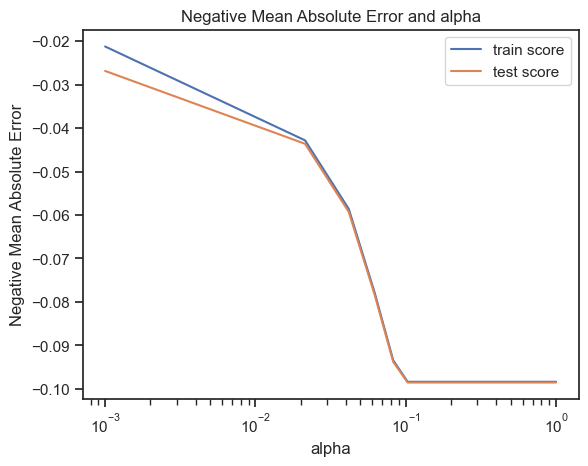

In [73]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [74]:
# Let's loop through different values of alpha to see the affect on r2 scores
for a in alphaArray:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    print('Alpha:{:1} |train_R2:{:2} |test_R2:{:3}'.format(a, r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred)))

Alpha:0.001 |train_R2:0.9375718204781958 |test_R2:0.9044207631017045
Alpha:0.021387755102040818 |train_R2:0.7613685042920835 |test_R2:0.7624443190777077
Alpha:0.041775510204081635 |train_R2:0.5963289842808117 |test_R2:0.5901039714667151
Alpha:0.062163265306122456 |train_R2:0.34246359781763536 |test_R2:0.3338600050543934
Alpha:0.08255102040816327 |train_R2:0.0902796221993929 |test_R2:0.0885626944421688
Alpha:0.10293877551020408 |train_R2:0.0 |test_R2:-0.00010100876959873162
Alpha:0.12332653061224491 |train_R2:0.0 |test_R2:-0.00010100876959873162
Alpha:0.1437142857142857 |train_R2:0.0 |test_R2:-0.00010100876959873162
Alpha:0.16410204081632654 |train_R2:0.0 |test_R2:-0.00010100876959873162
Alpha:0.18448979591836737 |train_R2:0.0 |test_R2:-0.00010100876959873162
Alpha:0.20487755102040817 |train_R2:0.0 |test_R2:-0.00010100876959873162
Alpha:0.225265306122449 |train_R2:0.0 |test_R2:-0.00010100876959873162
Alpha:0.24565306122448982 |train_R2:0.0 |test_R2:-0.00010100876959873162
Alpha:0.266040

#### We can see that as we increae Alpha, the R2 scores tend to converge. We also see that beyond Alpha:0.1029, the train R2 score goes to 0 and the test R2 score starts to take negative values which shows over penalization. Also, from the graph, we can conclude that for Alpha:0.001, the R2 scores are very close and the beyond that the Negative Mean Absolute Error decreases indiciating over-penalization. So, we will use Alpha:0.001 for our modelling with Lasso Regression.

In [76]:
# This puts alpha at 0.001, let's use this value.
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [77]:
lasso.coef_

array([ 3.91915782e-03,  4.98918819e-03,  8.34957579e-04,  6.99863735e-03,
        2.14010474e-04, -0.00000000e+00,  1.28934740e-02,  0.00000000e+00,
        0.00000000e+00, -6.20707156e-04,  3.77591769e-02,  4.70364871e-03,
       -0.00000000e+00,  4.97051468e-03,  2.42066198e-03,  0.00000000e+00,
       -3.75787974e-03,  1.55618589e-03,  5.85587656e-03,  4.02600511e-03,
        9.11238362e-03,  3.04501823e-03,  0.00000000e+00,  6.67223376e-04,
        1.44735063e-04,  4.44493707e-03,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -1.03218712e-02, -1.07781056e-02,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -2.85528752e-03,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -6.69646076e-04,  1.62552203e-04,
        7.55540114e-04,  0.00000000e+00, -2.32266122e-03, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.53200568e-04,  1.25165406e-03,
        9.79253666e-04,  5.13913131e-03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [78]:
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9375718204781958
0.9044207631017045


#### We have got the results as follows:
1. R2 score for test data: 0.93.
2. R2 score for train data: 0.90.

These seem pretty high and reasonably so as we have not removed a whole lot of variables in this modelling since we are relying on Lasso to do it for us by reducing the coefficients to 0.

In [80]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [81]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,LotFrontage,0.508320
11,BsmtFullBath,0.037759
7,1stFlrSF,0.012893
116,OverallQual_Fair,0.011896
121,OverallQual_Very Poor,0.011789
21,WoodDeckSF,0.009112
266,SaleType_Oth,0.008051
120,OverallQual_Very Good,0.007745
4,BsmtFinSF2,0.006999
69,Neighborhood_Edwards,0.006036


#### Summary of Lasso Regresison:

##### The top 5 predicor variables obtained are:
1. LotFrontage: Identifies the type of dwelling involved in the sale.
2. BsmtFullBath: Basement full bathrooms.
3. 1stFlrSF: First Floor square feet.
4. OverallQual_Fair: Overall quality being 'Fair'.
5. OverallQual_Very Poor: Overall quality being 'Very Poor'.

## 6. Summary.

#### After compairing both the models we can see that the below features are best explaining the Dataset (combining Ridge & Lasso):
1. LotFrontage: Identifies the type of dwelling involved in the sale.
2. BsmtFullBath: Basement full bathrooms.
3. 1stFlrSF: First Floor square feet.
4. 2ndFlrSF: Second floor square feet.
5. OverallQual_Fair: Overall quality being 'Fair'.
6. OverallQual_Very Poor: Overall quality being 'Very Poor'.
7. WoodDeckSF: Wood deck area in square feet.

#### Optimal alpha value for Ridge: 571.85.
#### Optimal alpha value for Lasso: 0.001.

#### Since we have too many preditor variables, we would use Lasso Regression as reduces the coefficients of predictor variables to 0 there by doing an automatic feature selection.

## This marks the end of the assignment.